#### 날씨 데이터 분석

In [25]:
# 모듈 연결
import pandas as pd
import numpy as np

In [147]:
# 데이터 가져오기
wtdf = pd.read_csv('./data/weather_seoul.csv', encoding='utf-8')
df1 = pd.read_csv('./data/weather_seoul_2000.csv', encoding='utf-8')
wtdf = pd.concat([wtdf, df1], ignore_index=True)

wtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40651 entries, 0 to 40650
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stnId           40651 non-null  int64  
 1   stnNm           40651 non-null  object 
 2   tm              40651 non-null  object 
 3   avgTa           40305 non-null  float64
 4   minTa           40302 non-null  float64
 5   minTaHrmt       29040 non-null  float64
 6   maxTa           40302 non-null  float64
 7   maxTaHrmt       29050 non-null  float64
 8   mi10MaxRn       8368 non-null   float64
 9   mi10MaxRnHrmt   6350 non-null   float64
 10  hr1MaxRn        8410 non-null   float64
 11  hr1MaxRnHrmt    6436 non-null   float64
 12  sumRnDur        9034 non-null   float64
 13  sumRn           16894 non-null  float64
 14  maxInsWs        23440 non-null  float64
 15  maxInsWsWd      40287 non-null  float64
 16  maxInsWsHrmt    23439 non-null  float64
 17  maxWs           40238 non-null 

In [148]:
# 필요한 데이터만 추출
df = wtdf[['tm', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn', 'iscs']].copy()
df.info()   # 전체적인 데이터의 정보를 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40651 entries, 0 to 40650
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tm      40651 non-null  object 
 1   stnNm   40651 non-null  object 
 2   avgTa   40305 non-null  float64
 3   minTa   40302 non-null  float64
 4   maxTa   40302 non-null  float64
 5   sumRn   16894 non-null  float64
 6   iscs    32322 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.2+ MB


In [149]:
# %%
df.head()  # 데이터의 일부를 확인

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,NaN,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


#### 데이터 전처리

- 결측지 처리

In [150]:
# 결측치 확인(null, NaN, None)
df.isnull().sum()  # df.isna().sum()

tm           0
stnNm        0
avgTa      346
minTa      349
maxTa      349
sumRn    23757
iscs      8329
dtype: int64

In [151]:
# 결측치 다른 값으로 대체
df[df['sumRn'].isnull()].head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
1,1910-01-02,서울,-7.2,-9.4,-4.3,NaN,({눈} 1 cm)
9,1910-01-10,서울,1.2,-2.8,4.5,NaN,{햇무리}{강도0}0015-0157.
10,1910-01-11,서울,3.1,0.1,7.4,NaN,NaN
12,1910-01-13,서울,2.4,-1.7,6.9,NaN,{안개}{강도0}0515-{안개}0624-{안개}{강도0}0806-0928.
22,1910-01-23,서울,-4.5,-7.2,0.6,NaN,NaN


In [152]:
# 일일강수량(sumRn)의 NaN값을 0으로 채워준다.
df['sumRn'] = df['sumRn'].fillna(0)  # NaN값을 0으로 채워준다.
df['sumRn'].isnull().sum()       # NaN값이 수정되었는지 확인한다.

0

In [153]:
df.head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


In [154]:
# 전체 NaN 확인
df.isnull().sum()

tm          0
stnNm       0
avgTa     346
minTa     349
maxTa     349
sumRn       0
iscs     8329
dtype: int64

In [155]:
df[df['maxTa'].isnull()]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
14853,1950-09-01,서울,NaN,NaN,NaN,0.0,{안개}{강도0}0655-1030. {비}{강도0} fd0932...0939.
14854,1950-09-02,서울,NaN,NaN,NaN,0.0,{안개}{강도0}0420-{안개}{강도1}0628-{안개}{강도2}0656-{안개}...
14855,1950-09-03,서울,NaN,NaN,NaN,0.0,{달무리}{강도0}0215-0420. {비}{강도0} fd1402...1430.
14856,1950-09-04,서울,NaN,NaN,NaN,2.3,{안개}{강도0}0450-{안개}{강도1}0655-{안개}{강도0}0802-0736...
14857,1950-09-05,서울,NaN,NaN,NaN,53.0,-{비}{강도0}-0008. {비}{강도0} fd0507-{비}{강도0}0516-...
...,...,...,...,...,...,...,...
15197,1953-11-29,서울,NaN,NaN,NaN,0.0,{연무}{강도0}0710-{연무}{강도1}0753-{연무}{강도2}0845-{연무}...
15198,1953-11-30,서울,NaN,NaN,NaN,33.5,-{연무}{강도0}-{연무}{강도0}0250-. {비}{강도0} fine1145....
20027,1967-02-19,서울,-1.7,NaN,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
22458,1973-10-16,서울,12.3,NaN,NaN,0.4,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도1}090...


In [156]:
# 결측지 포함된 행 삭제(dropna(axis=0)): nan이 하나라도 있으면 삭제
df.dropna(axis=0)

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...
...,...,...,...,...,...,...,...
40638,2023-07-26,서울,27.6,24.9,31.1,1.0,{비}0630-0705. {소나기}0915-1005. {소나기}1815-1835. ...
40639,2023-07-27,서울,28.4,24.4,32.2,0.0,{소나기}1610-1625.
40642,2023-07-30,서울,28.8,24.9,34.9,25.0,{소나기}1745-{소나기}{강도0}1800-{시정(미만)}{1km}{소나기}185...
40643,2023-07-31,서울,28.7,25.6,33.4,0.3,{소나기}1455-{소나기}{강도0}1500-1535.


In [157]:
df.dropna(thresh=2)   # thresh=2: NaN이 2개 이상인 행만 삭제
df.dropna(how='all')  # how='all': 모든 값이 NaN인 행만 삭제    

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...
...,...,...,...,...,...,...,...
40646,2023-08-03,서울,29.5,25.8,33.8,0.0,NaN
40647,2023-08-04,서울,30.0,26.5,34.4,0.0,NaN
40648,2023-08-05,서울,30.3,26.4,34.9,0.0,NaN
40649,2023-08-06,서울,29.8,27.0,33.0,4.9,{소나기}1450-{소나기}{강도0}1500-1625.


In [158]:
# avgTa가 NaN인 값이 있으면 해당 행 전체 삭제
df.dropna(subset=['avgTa'], inplace=True)  # df = df.dropna(subset=['avgTa'])
df.isnull().sum()

tm          0
stnNm       0
avgTa       0
minTa       3
maxTa       3
sumRn       0
iscs     8304
dtype: int64

In [159]:
df[df['minTa'].isna()]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20027,1967-02-19,서울,-1.7,NaN,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
22458,1973-10-16,서울,12.3,NaN,NaN,0.4,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도1}090...
40286,2022-08-08,서울,26.8,NaN,28.4,129.6,-{비}-0140. {비}0445-{비}{강도0}0600-{비}{강도0}0900-{...


In [160]:
df.loc[20025:20030]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20025,1967-02-17,서울,-5.7,-9.3,-1.5,0.0,{박무}{강도0}0920-1045.
20026,1967-02-18,서울,-4.6,-9.3,0.7,0.0,{박무}{강도0}0720-{박무}{강도1}0810-{박무}{강도0}1015-1140.
20027,1967-02-19,서울,-1.7,NaN,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
20028,1967-02-20,서울,1.7,-3.0,5.8,0.0,{박무}{강도0}0440-{박무}{강도1}1050-{박무}{강도2}1120-{박무}...
20029,1967-02-21,서울,5.2,4.5,6.8,0.4,-{박무}{강도0}-0120. {박무}{강도0}1320- {비}{강도0}fd07...
20030,1967-02-22,서울,8.6,2.5,13.3,45.1,{비}{강도0}fd0205...{비}{강도0}0218-{비}{강도0}fd 0237....


In [161]:
# minTa의 NaN 앞 데이터로 채우기
df['minTa'] = df['minTa'].fillna(method='ffill') # ffill or pad : 앞의 데이터로 채우기
df.loc[20025:20030]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20025,1967-02-17,서울,-5.7,-9.3,-1.5,0.0,{박무}{강도0}0920-1045.
20026,1967-02-18,서울,-4.6,-9.3,0.7,0.0,{박무}{강도0}0720-{박무}{강도1}0810-{박무}{강도0}1015-1140.
20027,1967-02-19,서울,-1.7,-9.3,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
20028,1967-02-20,서울,1.7,-3.0,5.8,0.0,{박무}{강도0}0440-{박무}{강도1}1050-{박무}{강도2}1120-{박무}...
20029,1967-02-21,서울,5.2,4.5,6.8,0.4,-{박무}{강도0}-0120. {박무}{강도0}1320- {비}{강도0}fd07...
20030,1967-02-22,서울,8.6,2.5,13.3,45.1,{비}{강도0}fd0205...{비}{강도0}0218-{비}{강도0}fd 0237....


In [162]:
# maxTa의 NaN: 뒤 데이터로 채우기
df['maxTa'] = df['maxTa'].fillna(method='bfill') # backfill: 뒤 데이터로 채우기
df.loc[20025:20030]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20025,1967-02-17,서울,-5.7,-9.3,-1.5,0.0,{박무}{강도0}0920-1045.
20026,1967-02-18,서울,-4.6,-9.3,0.7,0.0,{박무}{강도0}0720-{박무}{강도1}0810-{박무}{강도0}1015-1140.
20027,1967-02-19,서울,-1.7,-9.3,5.8,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
20028,1967-02-20,서울,1.7,-3.0,5.8,0.0,{박무}{강도0}0440-{박무}{강도1}1050-{박무}{강도2}1120-{박무}...
20029,1967-02-21,서울,5.2,4.5,6.8,0.4,-{박무}{강도0}-0120. {박무}{강도0}1320- {비}{강도0}fd07...
20030,1967-02-22,서울,8.6,2.5,13.3,45.1,{비}{강도0}fd0205...{비}{강도0}0218-{비}{강도0}fd 0237....


In [163]:
# iscs의 NaN을 '-'로 바꾸기(개별적으로 바꾸기)
df['iscs'].fillna('-', inplace=True)

# 전체 데이터에서 NaN이 있는지 확인
df.isnull().sum()

tm       0
stnNm    0
avgTa    0
minTa    0
maxTa    0
sumRn    0
iscs     0
dtype: int64

- 데이터 조회 및 관리

In [164]:
df.dtypes

tm        object
stnNm     object
avgTa    float64
minTa    float64
maxTa    float64
sumRn    float64
iscs      object
dtype: object

In [165]:
# columns 이름 확인
df.columns

Index(['tm', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn', 'iscs'], dtype='object')

In [166]:
# 2000-01-01 이후 날짜 조회
df[df['tm'] >= '2000-01-01']

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
32031,2000-01-01,서울,5.5,1.8,9.9,0.0,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}090...
32032,2000-01-02,서울,4.2,-0.9,6.9,6.0,{비}0445-{비}{강도0}0600-{비}{강도0}0900-1135. {뇌전}{...
32033,2000-01-03,서울,-2.2,-4.6,0.1,0.0,{박무}0320-{박무}{강도0}0600-0740.
32034,2000-01-04,서울,0.3,-4.3,4.3,0.0,{연무}1035-{연무}{강도0}1200-{연무}{강도0}1500-1750.
32035,2000-01-05,서울,2.8,0.1,4.6,18.4,{눈}0610-{눈}{강도0}0900-{진눈깨비}0920-{비}0950-{비}{강도...
...,...,...,...,...,...,...,...
40646,2023-08-03,서울,29.5,25.8,33.8,0.0,-
40647,2023-08-04,서울,30.0,26.5,34.4,0.0,-
40648,2023-08-05,서울,30.3,26.4,34.9,0.0,-
40649,2023-08-06,서울,29.8,27.0,33.0,4.9,{소나기}1450-{소나기}{강도0}1500-1625.


In [167]:
df.tail()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
40646,2023-08-03,서울,29.5,25.8,33.8,0.0,-
40647,2023-08-04,서울,30.0,26.5,34.4,0.0,-
40648,2023-08-05,서울,30.3,26.4,34.9,0.0,-
40649,2023-08-06,서울,29.8,27.0,33.0,4.9,{소나기}1450-{소나기}{강도0}1500-1625.
40650,2023-08-07,서울,30.4,27.3,34.6,0.0,-


#### 데이터 시각화

In [168]:
# 1961-01-01 ~1961-12-31 추출
wtf1 = df[(df['tm']>='1961-01-01') & (df['tm']<='1961-12-31')]   # 1961년 데이터 추출
wtf1.head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
17787,1961-01-01,서울,-9.8,-15.0,-4.9,0.0,{박무}{강도0}0540-{박무}{강도1}0615-{박무}{강도2}0640-{박무}...
17788,1961-01-02,서울,-6.2,-12.3,0.2,0.0,-{박무}{강도0}-{박무}{강도1}0905-{박무}{강도0}1010-1205. ...
17789,1961-01-03,서울,-1.1,-4.7,0.3,3.7,{박무}{강도0}0730-2050. {달무리}{강도0}2235-2320. {눈}...
17790,1961-01-04,서울,-9.5,-13.7,-4.7,0.0,{연무}{강도0}0835-1230. {연무}{강도0}1650-
17791,1961-01-05,서울,-10.8,-16.5,-6.2,0.0,-{연무}{강도0}-0256. {박무}{강도0}0616-{박무}{강도1}0905-...


In [186]:
# 2001-01-01 ~2001-12-31 추출
wtf2 = df[(df['tm']>='2022-01-01') & (df['tm']<='2022-12-31')]   # 2001년 데이터 추출
wtf2.head()

,tm,year,month,stnNm,avgTa,minTa,maxTa,sumRn,iscs
40067,2022-01-01,2022,01,서울,-4.3,-10.2,2.3,0.0,-
40068,2022-01-02,2022,01,서울,-1.3,-5.2,3.0,0.3,{눈}0305-{눈}{강도0}0600-0715. {박무}0610-0705. {박무...
40069,2022-01-03,2022,01,서울,-1.9,-8.0,2.5,0.0,{눈}1815-2055. {눈}2240-{눈}{강도0}2400-
40070,2022-01-04,2022,01,서울,-2.5,-5.6,1.0,0.0,-{눈}-0055.
40071,2022-01-05,2022,01,서울,-2.8,-7.8,1.9,0.0,{햇무리}0945-1535.


- matplotlib 모듈을 이용한 시각화

In [187]:
import matplotlib.pyplot as plt

# 한글 폰트 설정(windows)
import matplotlib.font_manager as fm
fl = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=fl)

# 한글 폰트 설정(mac)
# plt.rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

c:\ProgramData\miniconda3\envs\mtedu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


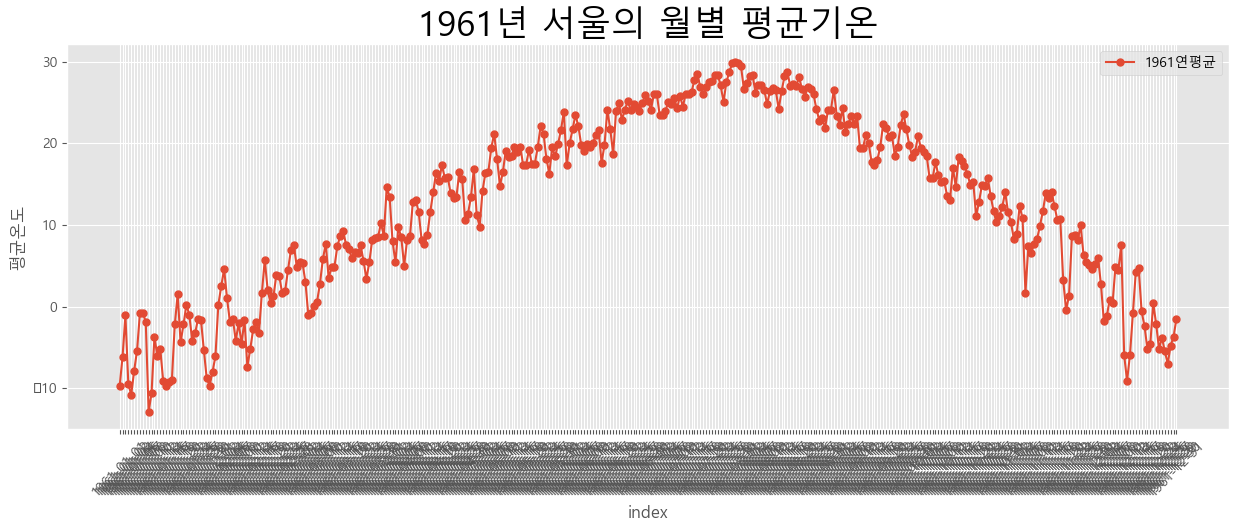

In [188]:
# 1961년 데이터를 이요한 차트 그리기
plt.style.use('ggplot')  # 차트 스타일 지정
plt.figure(figsize=(15,5)) # 차트 크기 지정
plt.xticks(rotation=45, size=10) # x축 라벨 회전/글자크기 10

# 차트 출력(꺾은선형)
# plt.plot(x축, y축, 마커, 마커크기, 라벨)
plt.plot(wtf1['tm'], wtf1['avgTa'], marker='o', markersize=5, label='1961연평균') 
plt.title('1961년 서울의 월별 평균기온', size=25) # 차트 제목
plt.xlabel('index') # x축 라벨
plt.ylabel('평균온도') # y축 라벨
plt.legend() # 범례 표시

plt.show()

c:\ProgramData\miniconda3\envs\mtedu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


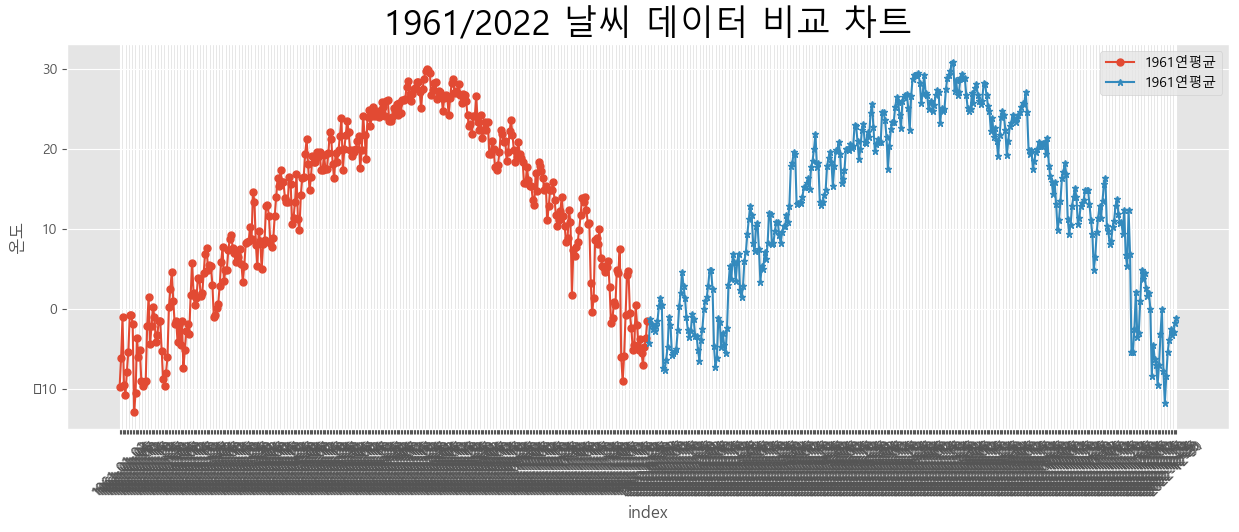

In [192]:
# 1961/2001 날씨 데이터 비교 차트

plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45, size=10)

plt.plot(wtf1['tm'], wtf1['avgTa'], marker='o', markersize=5, label='1961연평균') # 1961년도 연평균
plt.plot(wtf2['tm'], wtf2['avgTa'], marker='*', markersize=5, label='1961연평균') 

plt.title('1961/2022 날씨 데이터 비교 차트', size=25)
plt.xlabel('index', size=12)
plt.ylabel('온도', size=12)
plt.legend(loc='best')

plt.show()


In [193]:
len(wtf1), len(wtf2)

(365, 365)

In [194]:
print(wtf1.index)
print(wtf2.index)

RangeIndex(start=0, stop=365, step=1)
Index([40067, 40068, 40069, 40070, 40071, 40072, 40073, 40074, 40075, 40076,
       ...
       40422, 40423, 40424, 40425, 40426, 40427, 40428, 40429, 40430, 40431],
      dtype='int64', length=365)


In [195]:
# index 재설정(기존 index 삭제)
wtf1.reset_index(drop=True, inplace=True)
wtf2 = wtf2.reset_index(drop=True)

print(wtf1.index)
print(wtf2.index)

RangeIndex(start=0, stop=365, step=1)
RangeIndex(start=0, stop=365, step=1)


c:\ProgramData\miniconda3\envs\mtedu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


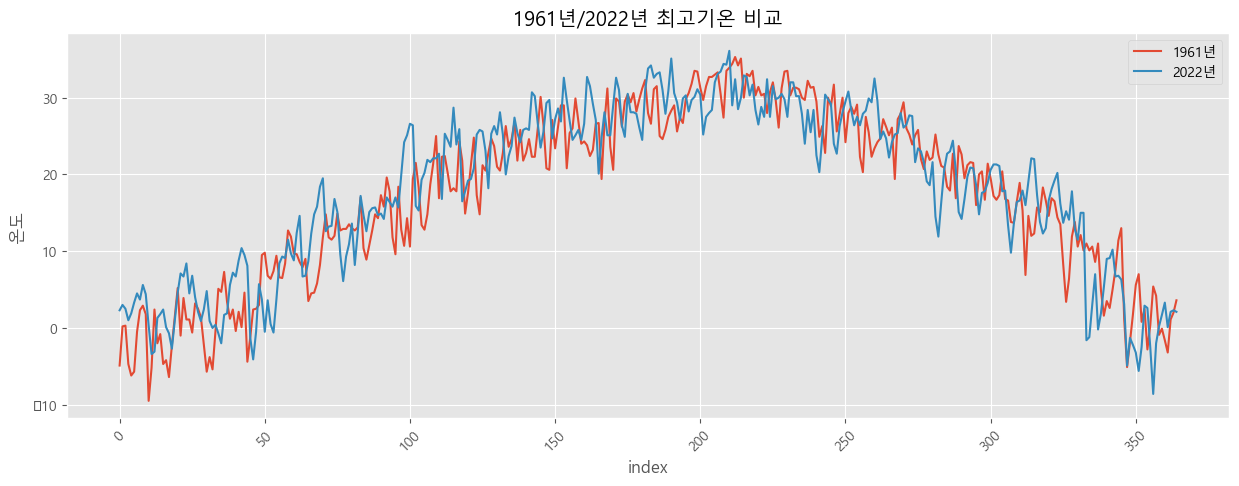

In [197]:
# index를 같이 사용하는 차트 작성
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)

plt.plot(wtf1.index, wtf1['maxTa'], label='1961년')
plt.plot(wtf2.index, wtf2['maxTa'], label='2022년')

plt.title('1961년/2022년 최고기온 비교')
plt.xlabel('index')
plt.ylabel('온도')
plt.legend()

plt.show()

#### 전체 데이터들 중에서 7월 중 최고온도 데이터를 이용한 그래프 작성(기간: 1960년 ~ 2022년)

In [198]:
df.head()

,tm,year,month,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,1910,01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,1910,01,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,1910,01,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,1910,01,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,1910,01,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


In [199]:
# tm에서 년/월을 추출해 month 컬럼을 만들기

# df['month'] = df['tm'].str.split('-').str[1]
df['year'] = df['tm'].str[:4]
df['month'] = df['tm'].str[5:7]

df.head()

,tm,year,month,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,1910,01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,1910,01,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,1910,01,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,1910,01,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,1910,01,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


In [200]:
# 필드 순서 변경하기
print(df.columns)
df=df[['tm', 'year', 'month', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn', 'iscs']]
df.head()

Index(['tm', 'year', 'month', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn',
       'iscs'],
      dtype='object')


,tm,year,month,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,1910,01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,1910,01,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,1910,01,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,1910,01,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,1910,01,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


-  각 년도별 7월의 최대온도 비교

In [201]:
# 1960이후 데이터중 7월 데이터만 추출
df_7 = df[(df['month'] == '07') & (df['year'] >= '1960')]

# 년에 대한 고유값 확인
year_lst=df_7['year'].unique()
year_lst

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [202]:
df_7[df_7['year'] == '1960'][['year', 'maxTa']]

,year,maxTa
17603,1960,24.2
17604,1960,29.8
17605,1960,24.4
17606,1960,26.4
17607,1960,30.6
17608,1960,30.4
17609,1960,22.3
17610,1960,22.3
17611,1960,27.0
17612,1960,30.2


- 각 년도별 7월의 최대 온도 구하기(max() 사용금지)

In [203]:
# 각 년도별 7월의 최대 온도 구하기(max() 사용금지)
yearTa = list() # 년도별 온도를 저장할 리스트

for y in year_lst:
    yeardf = df_7[df_7['year'] == y][['year', 'maxTa']] # 년도별 데이터프레임
    maxta = yeardf.iloc[0, -1]               # 년도별 7월 최고온도의 첫번째 값으로 초기화(iloc[]: 행번호(위치번호)로 접근)
    for i in yeardf.index:                   # 년도별 데이터프레임의 인덱스를 순회
        if yeardf.loc[i, 'maxTa'] > maxta:   # 최고온도와 현재온도를 비교
            maxta = yeardf.loc[i, 'maxTa']   # 현재온도 최고온도보다 높으면 최고온도 갱신
    yearTa.append(maxta)                     # 최고온도를 리스트에 추가

print(yearTa)

len(yearTa), len(year_lst)

[32.4, 34.4, 35.0, 33.1, 33.6, 35.2, 31.4, 35.0, 34.2, 32.3, 32.2, 32.0, 35.6, 34.5, 30.7, 33.4, 33.5, 35.0, 36.1, 32.2, 30.3, 35.2, 33.7, 30.9, 34.7, 35.4, 31.7, 31.2, 31.6, 33.3, 34.2, 32.0, 32.4, 31.1, 38.4, 33.6, 34.6, 36.1, 32.2, 34.9, 34.2, 32.8, 34.8, 31.4, 34.5, 34.2, 30.1, 31.2, 32.9, 32.4, 32.3, 34.1, 33.2, 31.3, 34.4, 36.0, 34.1, 35.4, 38.3, 36.1, 32.9, 36.5, 36.1, 34.9]


(64, 64)

In [204]:
yearMaxTa_df = pd.DataFrame([year_lst, yearTa]).T  # DataFrame 생성 및 행과 열을 바꿈
yearMaxTa_df.columns = ['year', 'maxTa']
yearMaxTa_df.head()

,year,maxTa
0,1960,32.4
1,1961,34.4
2,1962,35.0
3,1963,33.1
4,1964,33.6


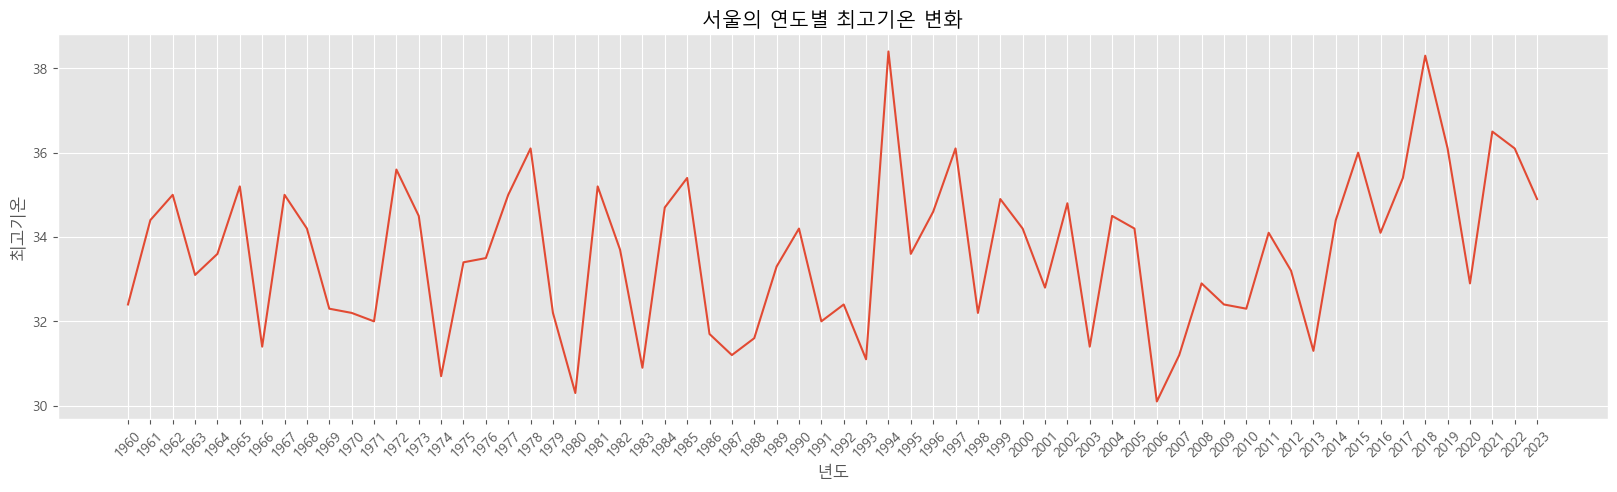

In [205]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45, size=10)

plt.plot(yearMaxTa_df['year'], yearMaxTa_df['maxTa'], label='최고기온')
plt.title('서울의 연도별 최고기온 변화')
plt.xlabel('년도')
plt.ylabel('최고기온')

plt.show()

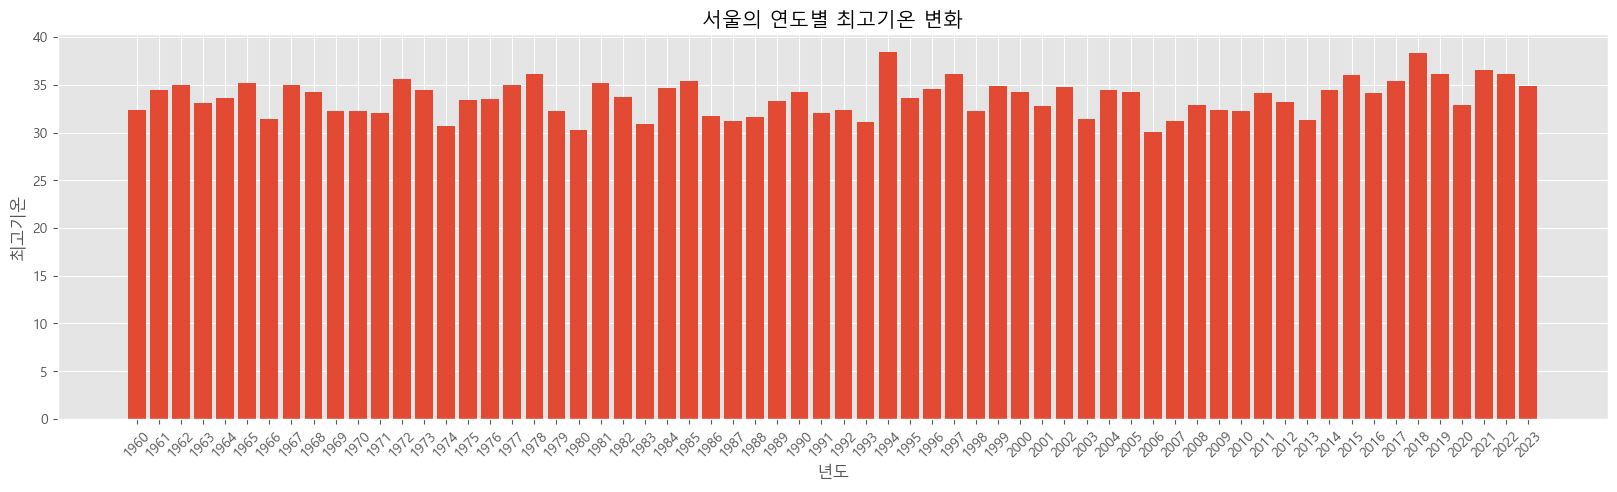

In [206]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45, size=10)

plt.bar(yearMaxTa_df['year'], yearMaxTa_df['maxTa'], label='최고기온') # 세로막대그래프
plt.title('서울의 연도별 최고기온 변화')
plt.xlabel('년도')
plt.ylabel('최고기온')

plt.show()

- 각 년도별 7월의 최대 온도 구하기(groupby(), max())

In [214]:
df7_group=df_7.groupby(['year', 'month'])['maxTa'].max()
df7_group=df7_group.reset_index()[['year','maxTa']]
df7_group

,year,maxTa
0,1960,32.4
1,1961,34.4
2,1962,35.0
3,1963,33.1
4,1964,33.6
...,...,...
59,2019,36.1
60,2020,32.9
61,2021,36.5
62,2022,36.1


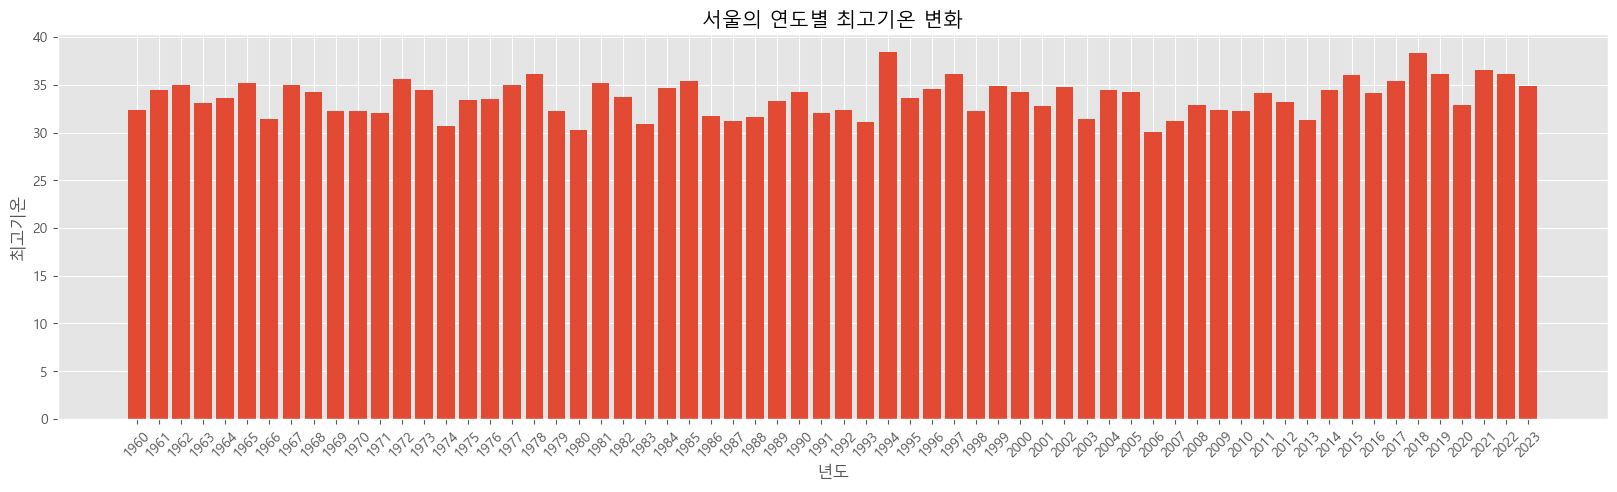

In [215]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45, size=10)

plt.bar(df7_group['year'], df7_group['maxTa'], label='최고기온') # 세로막대그래프
plt.title('서울의 연도별 최고기온 변화')
plt.xlabel('년도')
plt.ylabel('최고기온')

plt.show()

#### 년도별 연평균 기온(온도)를 그래프로 출력(groupby())

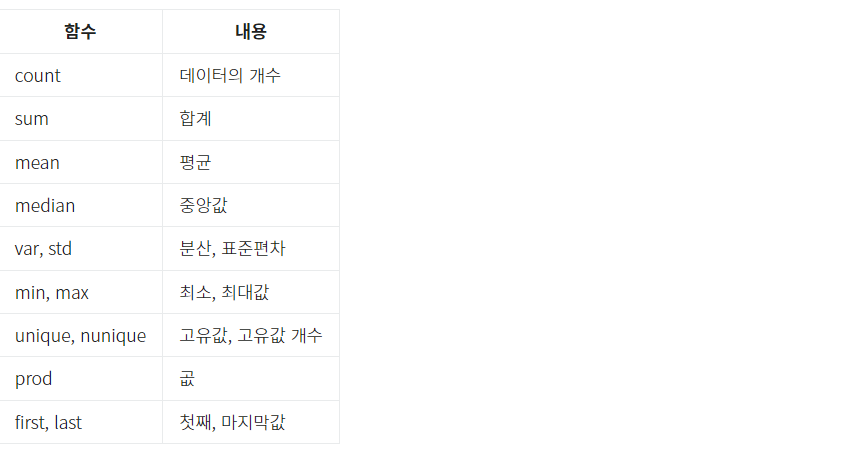

In [216]:
df.columns

Index(['tm', 'year', 'month', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn',
       'iscs'],
      dtype='object')

In [219]:
plt_df = df.groupby('year')[['avgTa', 'minTa', 'maxTa']].mean().reset_index()
plt_df

,year,avgTa,minTa,maxTa
0,1910,10.412055,5.752603,16.008767
1,1911,10.654795,6.035616,16.001644
2,1912,10.123770,5.086885,15.646995
3,1913,10.086027,4.975068,15.651233
4,1914,12.029041,7.764658,17.061370
...,...,...,...,...
107,2019,13.598904,9.321096,18.602192
108,2020,13.271858,9.389617,17.867213
109,2021,13.752055,9.622466,18.491781
110,2022,13.296164,9.256438,18.077808


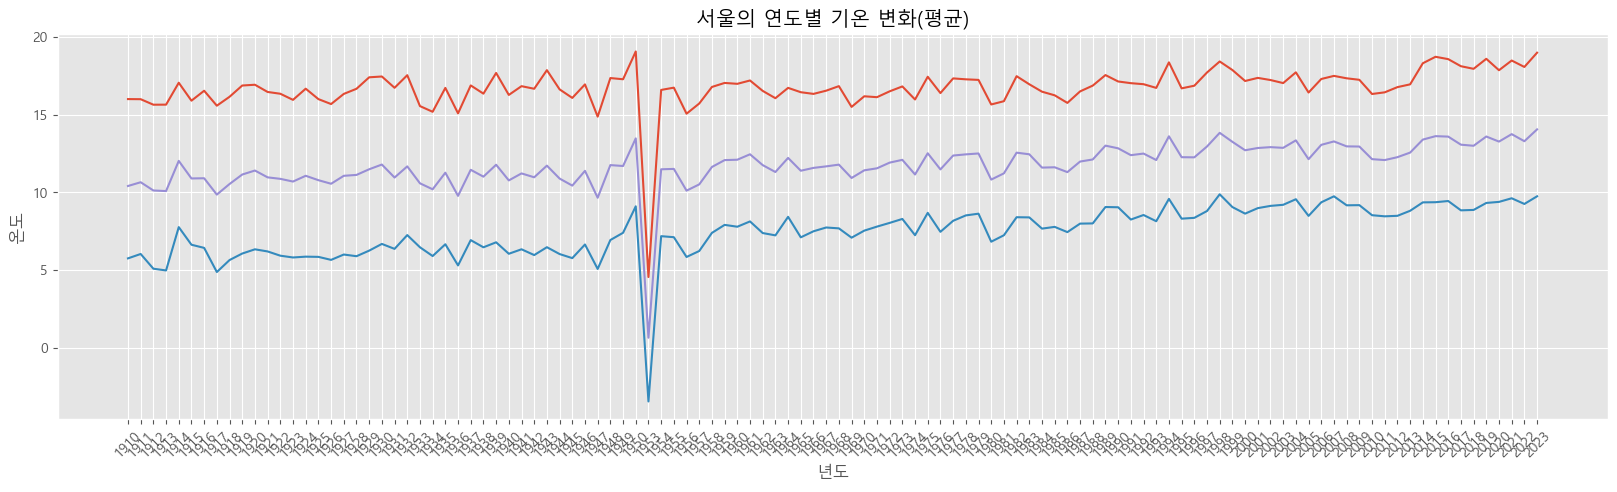

In [220]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45, size=10)

plt.plot(plt_df['year'], plt_df['maxTa'], label='최고기온')
plt.plot(plt_df['year'], plt_df['minTa'], label='최저기온')
plt.plot(plt_df['year'], plt_df['avgTa'], label='평균기온')

plt.title('서울의 연도별 기온 변화(평균)')
plt.xlabel('년도')
plt.ylabel('온도')

plt.show()